<a href="https://colab.research.google.com/github/linkvarun/Jupyter_Notebook/blob/master/pycarat_liver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np

In [4]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 320 kB 29.1 MB/s 
     |████████████████████████████████| 4.8 MB 55.0 MB/s 
     |████████████████████████████████| 141 kB 66.4 MB/s 
     |████████████████████████████████| 56 kB 4.9 MB/s 
     |████████████████████████████████| 1.7 MB 58.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 17.0 MB 186 kB/s 
     |████████████████████████████████| 1.3 MB 57.4 MB/s 
     |████████████████████████████████| 6.8 MB 63.0 MB/s 
     |████████████████████████████████| 167 kB 67.2 MB/s 
     |████████████████████████████████| 88 kB 382 kB/s 
     |████████████████████████████████| 2.0 MB 58.2 MB/s 
     |████████████████████████████████| 25.9 MB 1.2 MB/s 
     |████████████████████████████████| 

In [2]:
import pandas as pd
import pycaret

In [3]:
dataset=pd.read_csv('/content/indian_liver_patient.csv')

In [4]:
dataset.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [5]:
dataset.shape

(583, 11)

In [6]:
dataset.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [30]:
data['Gender'] = data['Gender'].astype('category')
data['Gender'] = data['Gender'].cat.codes

In [25]:
data['Albumin_and_Globulin_Ratio']=data['Albumin_and_Globulin_Ratio'].fillna(data['Albumin_and_Globulin_Ratio'].median())

In [ ]:
#splitting the data into training and test

In [31]:
# training data
data=dataset.sample(frac=0.9, random_state=1).reset_index(drop=True)


In [32]:
# testing data
data_unseen= dataset.drop(data.index).reset_index(drop=True)

In [28]:
print('Data for Modeling' + str(data.shape))
print("#"*10)
print('Unseen Data for prediction' + str(data_unseen.shape))

Data for Modeling(525, 11)
##########
Unseen Data for prediction(58, 11)


In [13]:
from pycaret.classification import *

In [14]:
exp_clf101 = setup(data=data, target='Dataset', session_id=123)

,Description,Value
0,session_id,123
1,Target,Dataset
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(525, 11)"
5,Missing Values,True
6,Numeric Features,9
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Dataset',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_stra...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

In [15]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.7603,0.7250,0.9270,0.7907,0.8525,0.2179,0.2433,0.438
rf,Random Forest Classifier,0.7526,0.7356,0.9279,0.7838,0.8488,0.1858,0.2093,0.447
dummy,Dummy Classifier,0.7493,0.5000,1.0000,0.7493,0.8567,0.0000,0.0000,0.010
ridge,Ridge Classifier,0.7411,0.0000,0.9890,0.7472,0.8511,-0.0151,-0.0235,0.010
lda,Linear Discriminant Analysis,0.7355,0.7009,0.9816,0.7457,0.8474,-0.0251,-0.0375,0.011
lightgbm,Light Gradient Boosting Machine,0.7279,0.6909,0.8767,0.7844,0.8262,0.1847,0.1989,0.098
lr,Logistic Regression,0.7247,0.7266,0.9530,0.7485,0.8376,-0.0033,-0.0015,0.378
gbc,Gradient Boosting Classifier,0.7197,0.7138,0.8589,0.7874,0.8197,0.1791,0.1836,0.083
knn,K Neighbors Classifier,0.7141,0.6369,0.8622,0.7808,0.8178,0.1449,0.1562,0.111
ada,Ada Boost Classifier,0.7137,0.6905,0.8368,0.7932,0.8134,0.1961,0.1998,0.078


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)

In [16]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7297,0.8333,0.9643,0.7500,0.8437,-0.0511,-0.0945
1,0.6216,0.4048,0.7857,0.7333,0.7586,-0.1116,-0.1130
2,0.7297,0.7183,0.9643,0.7500,0.8437,-0.0511,-0.0945
3,0.7568,0.7540,1.0000,0.7568,0.8615,0.0000,0.0000
4,0.7838,0.7540,0.9643,0.7941,0.8710,0.2410,0.2932
5,0.7568,0.8111,1.0000,0.7500,0.8571,0.1395,0.2739
6,0.7297,0.7111,1.0000,0.7297,0.8437,0.0000,0.0000
7,0.6944,0.6872,0.9259,0.7353,0.8197,-0.1000,-0.1400
8,0.6944,0.8354,0.9259,0.7353,0.8197,-0.1000,-0.1400


INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [35]:
tuned_lr = tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7297,0.8452,0.9643,0.7500,0.8437,-0.0511,-0.0945
1,0.6486,0.4484,0.8214,0.7419,0.7797,-0.0761,-0.0785
2,0.7838,0.6984,1.0000,0.7778,0.8750,0.1591,0.2940
3,0.7297,0.7540,0.9643,0.7500,0.8437,-0.0511,-0.0945
4,0.8108,0.7778,1.0000,0.8000,0.8889,0.3019,0.4216
5,0.7838,0.7815,1.0000,0.7714,0.8710,0.2673,0.3928
6,0.7297,0.6852,1.0000,0.7297,0.8437,0.0000,0.0000
7,0.7222,0.6996,0.9259,0.7576,0.8333,0.0476,0.0580
8,0.6944,0.8272,0.9259,0.7353,0.8197,-0.1000,-0.1400


INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 5
INFO:logs:LogisticRegression(C=7.863, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [40]:
plot_model = plot_model(tuned_lr)

INFO:logs:Initializing plot_model()
INFO:logs:plot_model(fold=None, use_train_data=False, verbose=True, is_in_evaluate=False, display=None, display_format=None, estimator=LogisticRegression(C=7.863, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), feature_name=None, fit_kwargs=None, groups=None, label=False, plot=auc, plot_kwargs=None, save=False, scale=1, system=True)
INFO:logs:Checking exceptions
INFO:logs:Preparing display monitor


IntProgress(value=0, description='Processing: ', max=5)

INFO:logs:Preloading libraries
INFO:logs:Copying training dataset
INFO:logs:Copying test dataset
INFO:logs:Plot type: auc
INFO:logs:Initializing get_config()
INFO:logs:get_config(variable=prep_pipe)
INFO:logs:Global variable: prep_pipe returned as Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Dataset',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_stra...
                ('scaling', 'passthroug

ValueError: ignored

<Figure size 576x396 with 0 Axes>

In [41]:
eval_model_lr = evaluate_model(tuned_lr)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=LogisticRegression(C=7.863, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

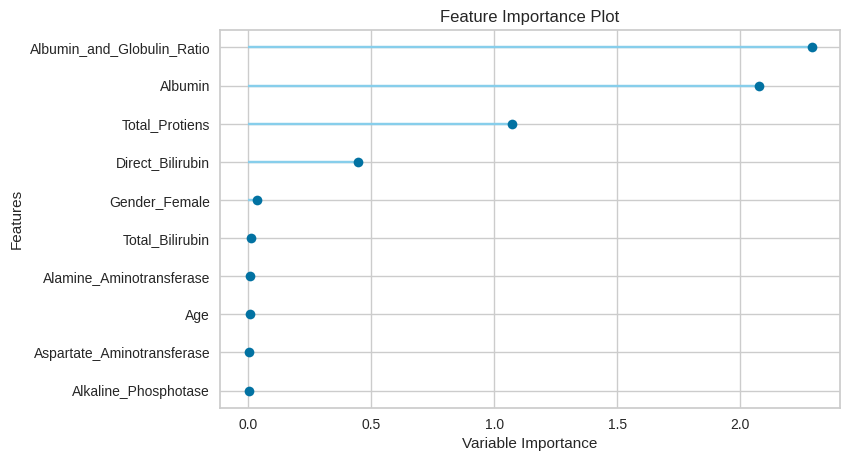

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [37]:
# most significant feature
plot_model(tuned_lr, plot='feature')

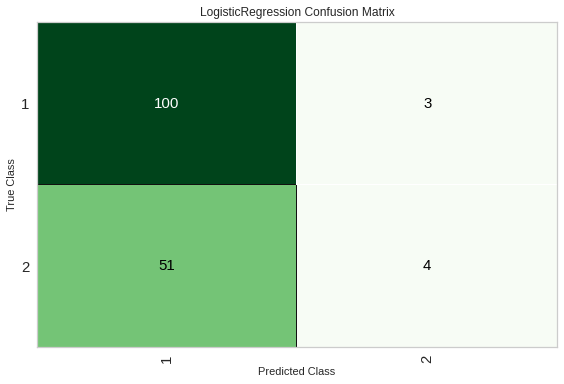

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [39]:
plot_model(tuned_lr, plot='confusion_matrix')

In [17]:
et = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7838,0.6944,1.0000,0.7778,0.8750,0.1591,0.2940
1,0.7838,0.5675,0.8929,0.8333,0.8621,0.3648,0.3695
2,0.7297,0.5794,0.9643,0.7500,0.8437,-0.0511,-0.0945
3,0.7568,0.7679,0.8929,0.8065,0.8475,0.2550,0.2633
4,0.7838,0.7579,0.9643,0.7941,0.8710,0.2410,0.2932
5,0.8378,0.9370,0.9630,0.8387,0.8966,0.5297,0.5578
6,0.6216,0.6315,0.8148,0.7097,0.7586,-0.0975,-0.1026
7,0.7222,0.6626,0.8519,0.7931,0.8214,0.2000,0.2026
8,0.7500,0.8477,0.9630,0.7647,0.8525,0.1000,0.1400


INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [19]:
from sklearn.linear_model import LogisticRegression

In [23]:
lr_model = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
lr_model.fit(data,data_unseen)

ValueError: ignored